In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/SHIELA4/BSIS2A_Felicitas-ShielaMaeB/refs/heads/main/StudentsPerformance1.csv')

In [63]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [64]:
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [65]:

# Convert 'test preparation course' to numerical representation using one-hot encoding
X_simple = pd.get_dummies(df[['test preparation course']], drop_first=True)
# drop_first=True to avoid multicollinearity

# Define your target variable 'y'.
# Assuming 'math score' is the target, replace with your desired target column
y = df['writing score']

# Now, fit the model
simple_model = LinearRegression()
simple_model.fit(X_simple, y)

LinearRegression()

In [ ]:
y_pred = simple_model.predict(X_simple)

In [ ]:
# The explanatory variables: Independent Variable (Test Preparation Course)
df['test preparation course'] = df['test preparation course'].astype(str).map({'none': 0, 'completed': 1}).fillna(0).astype(int)

In [ ]:
x = df[['test preparation course']] #independent variable
y = df['writing score'] #dependent variable

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
# Coefficient Interpretation
print("Intercept (Beta_0):", model.params[0])
print("Coefficient (Beta_1):", model.params[1])
print(f"Interpretation: For students who completed the test preparation course, the average writing score increases by {model.params[1]:.2f} point conpared to those who did not.")

Intercept (Beta_0): 64.50467289719629
Coefficient (Beta_1): 9.91432151621158
Interpretation: For students who completed the test preparation course, the average writing score increases by 9.91 point conpared to those who did not.


<ipython-input-54-46e81d8dcea1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept (Beta_0):", model.params[0])
<ipython-input-54-46e81d8dcea1>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Coefficient (Beta_1):", model.params[1])
<ipython-input-54-46e81d8dcea1>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Interpretation: For students who completed the test preparation course, the average writing

In [ ]:
# Predict math scores using the model
y_pred = model.predict(x)

In [ ]:
print("Predicted writing score: ", y_pred)

Predicted writing score:  [64.5046729  74.41899441 64.5046729  64.5046729  64.5046729  64.5046729
 74.41899441 64.5046729  74.41899441 64.5046729  64.5046729  64.5046729
 64.5046729  74.41899441 64.5046729  64.5046729  64.5046729  64.5046729
 74.41899441 64.5046729  64.5046729  74.41899441 64.5046729  64.5046729
 74.41899441 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729
 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729  74.41899441
 64.5046729  64.5046729  74.41899441 64.5046729  64.5046729  64.5046729
 64.5046729  74.41899441 64.5046729  64.5046729  74.41899441 64.5046729
 74.41899441 74.41899441 64.5046729  74.41899441 64.5046729  64.5046729
 74.41899441 64.5046729  74.41899441 64.5046729  74.41899441 64.5046729
 74.41899441 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729
 64.5046729  64.5046729  64.5046729  64.5046729  74.41899441 74.41899441
 64.5046729  64.5046729  64.5046729  64.5046729  64.5046729  74.41899441
 74.41899441 64.5046729  64.5046729

In [ ]:
# Using statsmodels for p-values and summary (for statistical analysis)
X_with_const = sm.add_constant(x)  # Add a constant for the intercept term (which is necessary for OLS in statsmodels)
ols_model = sm.OLS(y, X_with_const).fit()  # Fit the OLS model using statsmodels

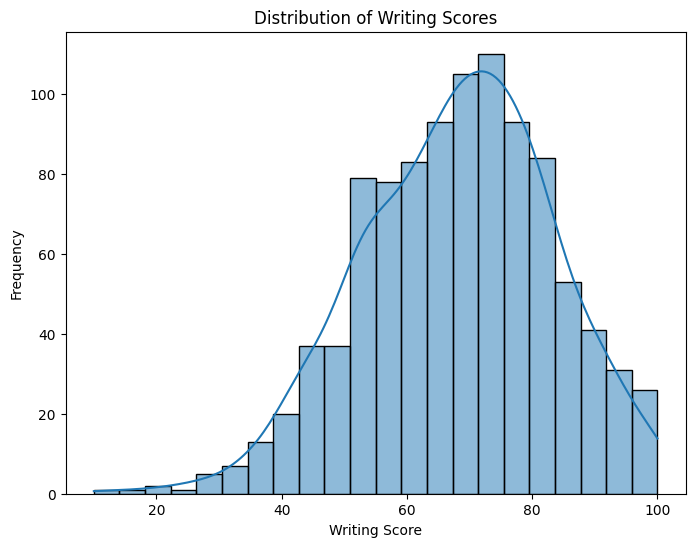

In [ ]:
# Histogram of writing scores
plt.figure(figsize=(8, 6))
sns.histplot(df['writing score'], kde=True) # kde=True adds a density curve
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

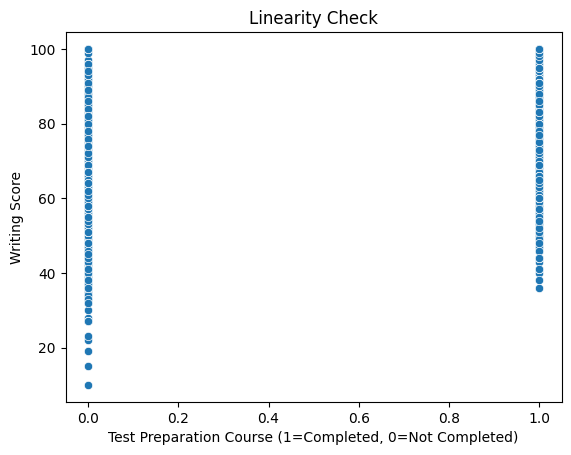

In [ ]:
# Model Diagnostics
# Linearity
sns.scatterplot(x='test preparation course', y='writing score', data=df)
plt.title('Linearity Check')
plt.xlabel('Test Preparation Course (1=Completed, 0=Not Completed)') # binary
plt.ylabel('Writing Score')
plt.show()

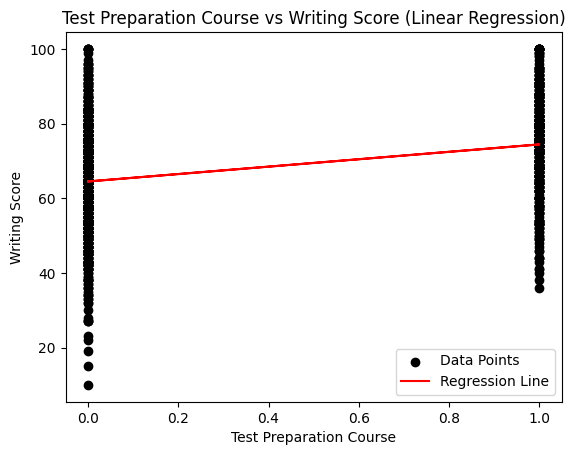

In [ ]:
# Plotting the Regression Line and the Data Points
plt.scatter(x, y, color='black', label='Data Points')  # Actual data points
plt.plot(x, y_pred, color='red', label='Regression Line')  # Regression line
plt.title("Test Preparation Course vs Writing Score (Linear Regression)")
plt.xlabel("Test Preparation Course")  # Label for X-axis
plt.ylabel("Writing Score")  # Label for Y-axis
plt.legend()  # Display legend for plot
plt.show()  # Show the plot

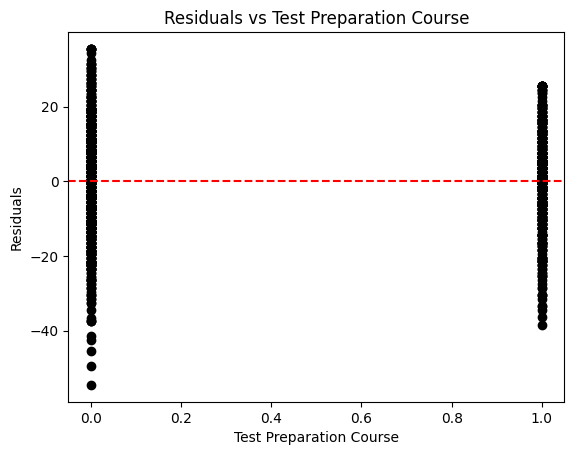

In [ ]:
# Residuals Plot: Check for the residuals (actual - predicted values)
residuals = y - y_pred  # Calculate residuals
plt.scatter(x, residuals, color='black')  # Plot residuals
plt.axhline(0, color='red', linestyle='--')  # Red dashed line for residuals = 0
plt.title("Residuals vs Test Preparation Course")
plt.xlabel("Test Preparation Course")  # Label for X-axis
plt.ylabel("Residuals")  # Label for Y-axis
plt.show()  # Display residuals plot

In [ ]:
X = df[['test preparation course']]
X = sm.add_constant(X)
Y = df['writing score']

In [ ]:
# Model Estimation
model = sm.OLS(Y, X).fit()  # Fit the model
print ("Estimated Regression Equation:")
print(f"Writing Score (model.params[0]:.2f) + (model.params[1]:.2f) Test PreparationCourse")

Estimated Regression Equation:
Writing Score (model.params[0]:.2f) + (model.params[1]:.2f) Test PreparationCourse


In [ ]:
print(model.summary())  # Displays regression results

                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           3.69e-24
Time:                        10:10:14   Log-Likelihood:                -4087.9
No. Observations:                1000   AIC:                             8180.
Df Residuals:                     998   BIC:                             8190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Independence
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(dw)

# This code is checking if there is a pattern or correlation in the errors of our prediction model.
# If the errors are random (which is ideal), the Durbin-Watson statistic will be close to 2.
# If there's a pattern in the errors, it means our model might not be capturing all the information
# in the data, and its predictions might not be as reliable.

2.010720085165608


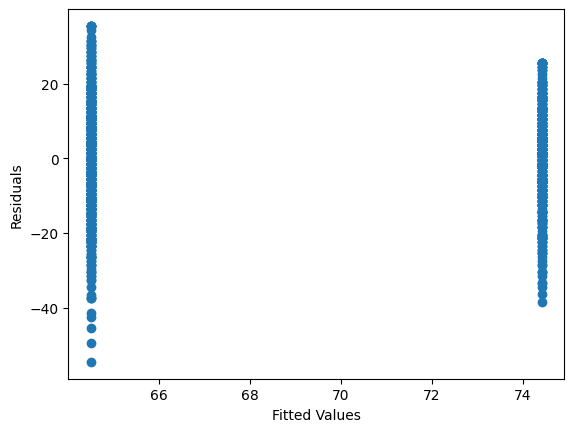

In [ ]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
print(model.rsquared)  # R-squared value
print(model.fvalue)  # F-statistic value

0.0979353769735648
108.3508916375644


In [58]:
# Statistical Significance
print("P-values for Coefficients:")
print(model.pvalues)
if model.pvalues[1] < 0.05:
    print("The test preparation course has a statistically significant effect on writing scores.")
else:
    print("The test preparation course does not have a statistically significant effect on writing scores.")

P-values for Coefficients:
const                      0.000000e+00
test preparation course    3.685292e-24
dtype: float64
The test preparation course has a statistically significant effect on writing scores.


<ipython-input-58-4d804690ebcf>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < 0.05:


In [60]:
print(model.conf_int())  # Confidence intervals for the coefficients

#In the context of linear regression, confidence intervals provide a range of values within which we are
# fairly confident that the true population parameter (the coefficient) lies

                                 0          1
const                    63.386360  65.622986
test preparation course   8.045267  11.783376
